#Project name and Type
##Corona Virus Tweet Sentiment analysis using Classificaton


#Collaboration-Individual
##name-Siddique Aslam

#Github link-https://github.com/siddique5936/coronavirus_tweet_sentiment_analysis/tree/main





#summary
###OBJECTIVE
Sentiment analysis on tweets related to the coronavirus (COVID-19) can be useful for understanding public opinion, tracking trends, and identifying potential areas of concern. In this task, we can use machine learning techniques, such as logistic regression or support vector machines, to predict the sentiment of a given tweet as positive, negative, or neutral.

###INTRODUCTION  
Text classification with the help of machine learning can be achieved using many ML algorithm like Logistic Regression with Grid Search CV

Decision Tree Classifier(Count Vector and TF ID Vectorization techniques).

KNN(Count Vector and TF ID Vectorization techniques).

SVM Classifier (Count Vector and TF ID Vectorization techniques).

Multinomial Navies Bayes & Bernoulli Navies Bayes(Count Vector and TF ID Vectorization techniques).

Random Forest(Count Vector and TF ID Vectorization techniques).

Stochastic Gradient Descent(Count Vector and TF ID Vectorization techniques).

###DATASET  
Coronavirus Tweet Sentiment analysis dataset comprises of 41156 records which has 6 columns namely 'Location', 'Tweet At', 'Original Tweet', 'Sentiment','User name','Screen name'. In between 'Sentiment' column which tells about the inclination of the tweet in terms of 'positive', 'negetive', 'extremely positive','extremely negative'. So, here our target variable or dependent features is 'sentiment'.

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the data
df=pd.read_csv('/content/drive/MyDrive/Coronavirus Tweets.csv',encoding='latin-1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


##Data Inspection

In [ ]:
# shape of the data
df.shape

(41157, 6)

here 41157 rows and 6 columns in this dataset

In [ ]:
df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [ ]:
#let's obtain some information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


here we can see that there is no null values expect Locaton variable and there are 4 cathegorical values and 2 integers values

In [ ]:
# calculating missing values
df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Location column contains missing values whereas other columns having 0 missing values

In [ ]:
# calculating mising value percentages and visualizing through char
column=df.columns
per_nullvalues=(df.isnull().sum()/len(df))*100

per_nullvalues


UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

<BarContainer object of 6 artists>

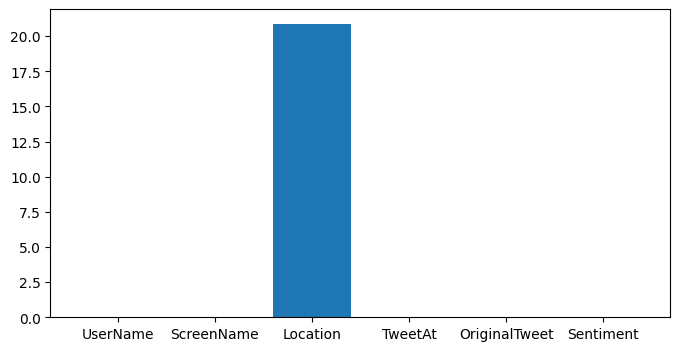

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(per_nullvalues.index,per_nullvalues.values)

In [ ]:
# finding duplicate values
df.duplicated().any()

False

so there is no duplicate values here

In [ ]:
df.columns

In [ ]:
# counting unique values for each and every variables
for var in df.columns:
  unique_values=df[var].value_counts()
  print(unique_values)

3799     1
31291    1
31233    1
31234    1
31235    1
        ..
17519    1
17520    1
17521    1
17522    1
44955    1
Name: UserName, Length: 41157, dtype: int64
48751    1
76243    1
76185    1
76186    1
76187    1
        ..
62471    1
62472    1
62473    1
62474    1
89907    1
Name: ScreenName, Length: 41157, dtype: int64
London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64
20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480


##Data visualizations

<Figure size 1200x600 with 0 Axes>

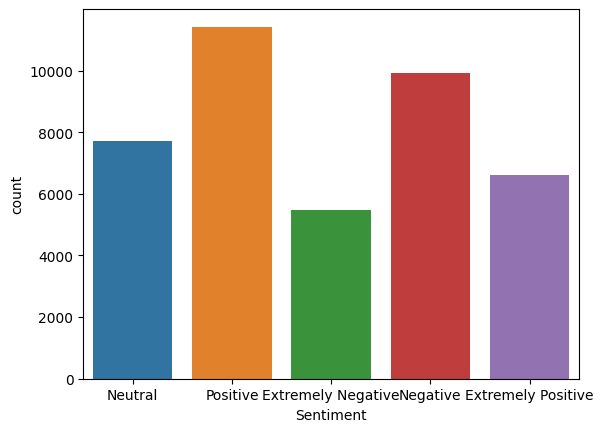

<Figure size 1200x600 with 0 Axes>

In [ ]:
# visualizing sentiments variables

sns.countplot(x=df['Sentiment'])
plt.figure(figsize=(12,6))


1. Why did you pick the specific chart?

Answer Here.

A count chart can effectively show the count of tweets for each sentiment category in a clear and concise way. Each sentiment category can be represented by a bar, with the height of the bar indicating the count of tweets for that sentiment category.




2. What is/are the insight(s) found from the chart?

Answer Here

Positive Sentiment is high as compared to the Negative, Neutral Sentiment.

In [ ]:
replace_values={"Sentiment":{'Extremely Negative':'Negative','Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [ ]:
sentiment_count=df['Sentiment'].value_counts().reset_index()
sentiment_count.columns=['Sentiment','Count']
sentiment_count

,Sentiment,Count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


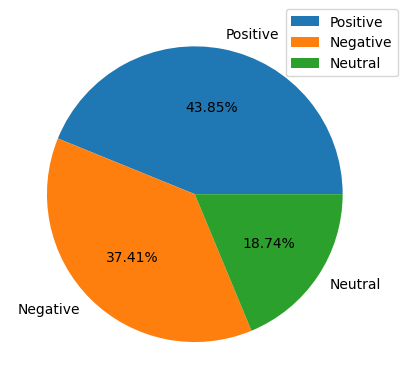

In [ ]:
# plotting sentiments using pie chart
sentiment_count=df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Neutral']
plt.pie(x=sentiment_count,labels=labels,autopct="%.2f%%",radius=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0)

1. Why did you pick the specific chart?

Answer Here.

Pie charts are useful when you want to show the relative sizes of different categories, and they allow for quick and easy comparison between the categories.In this case, the whole data is the set of tweets, and the parts are the different sentiment categories (positive, negative, and neutral).

2. What is/are the insight(s) found from the chart?
Answer Here

Positive Sentiment is in High Proportion as 43.85% as compared to negative and netural i.e 18.74% and 37.41%.

In [ ]:
count_location=df['Location'].value_counts().sort_values(ascending=False).head(10)
count_location

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

<Figure size 1200x500 with 0 Axes>

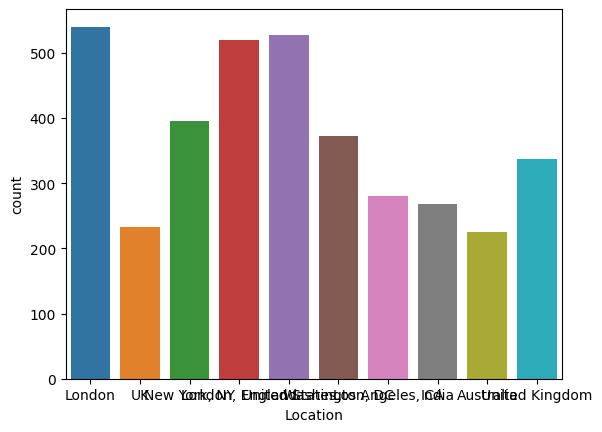

<Figure size 1200x500 with 0 Axes>

In [ ]:
# now visulizing the location variables

sns.countplot(data=df[df['Location'].isin(count_location.index)],x='Location')
plt.figure(figsize=(12,5))


1. Why did you pick the specific chart?

Answer Here.

To visualize this data, i used a count chart . A count chart can effectively show the count of tweets from each location in a clear and concise way. Each location can be represented by a bar, with the height of the bar indicating the count of tweets from that location.

2. What is/are the insight(s) found from the chart?

Answer Here

City London has Highest tweet comapred to other city tweet.

In [ ]:
# counting the date where maximum number of tweets are tweeted
df['TweetAt'].value_counts().head(10)


20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
Name: TweetAt, dtype: int64

Text(0, 0.5, 'counts')

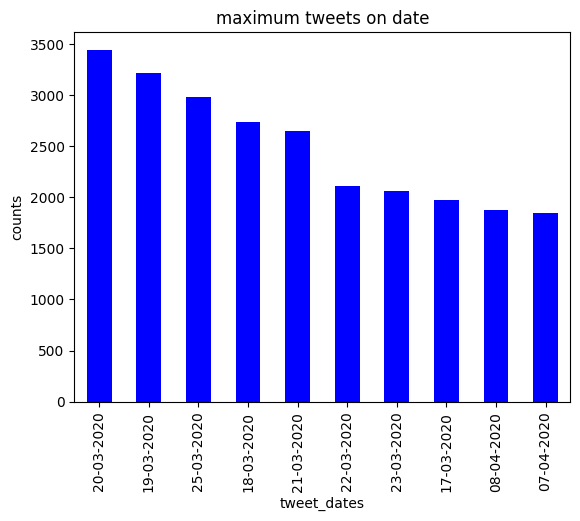

In [ ]:
# visualizing the date where number of tweets where tweeted
plt.title('maximum tweets on date')
df['TweetAt'].value_counts().head(10).plot(kind='bar',color='blue')


plt.xlabel('tweet_dates')
plt.ylabel('counts')

1. Why did you pick the specific chart?

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?

Answer Here

Dated 20 March ,2020 has highest number of tweet i.e 3448.

#Textual Data Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [ ]:
df['OriginalTweet']=df['OriginalTweet'].str.lower()
df['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

#Removing Punctuations

In [ ]:
df['OriginalTweet']=df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)



<ipython-input-15-e5bf1a18c50e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['OriginalTweet']=df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)


In [ ]:
import string
def remove_punctuations(text):
  for punctuation in string.punctuation:
    text=text.replace(punctuation,'')
  return text

In [ ]:
df['clean_tweets']=df['OriginalTweet'].apply(remove_punctuations)

df['clean_tweets']


0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: clean_tweets, Length: 41157, dtype: object

In [ ]:
df['clean_tweets']=df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
df.head()


<ipython-input-18-8405d2b18d22>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweets']=df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv and and
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",Negative,me ready to go at supermarket during the covid...


#Remove Stopwords

In [ ]:
df['clean_tweets']=df['clean_tweets'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df['clean_tweets'][10]

'month hasnt crowding supermarkets restaurants however reducing hours closing malls means everyone using entrance dependent single supermarket manila lockdown covid philippines'

##Most Common Words

In [ ]:
from collections import Counter

In [ ]:
df['temp_list']=df['clean_tweets'].apply(lambda x: str(x).split())


In [ ]:
top=Counter([item for sublist in df['temp_list']for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp=temp.iloc[1:,:]
temp.columns=['Common_words','count']
temp.style.background_gradient(cmap='Purples')


,Common_words,count
1,coronavirus,18028
2,prices,7910
3,food,7057
4,supermarket,7008
5,store,6797
6,grocery,6239
7,people,5537
8,amp,4961
9,consumer,4485
10,shopping,3602


#Word Cloud

In [ ]:
from wordcloud  import WordCloud

In [ ]:
text=''.join(tweets.split()[0] for tweets in df.OriginalTweet)
word_cloud=WordCloud(collocations=False,background_color = 'white', width=1000, height=800).generate(text)



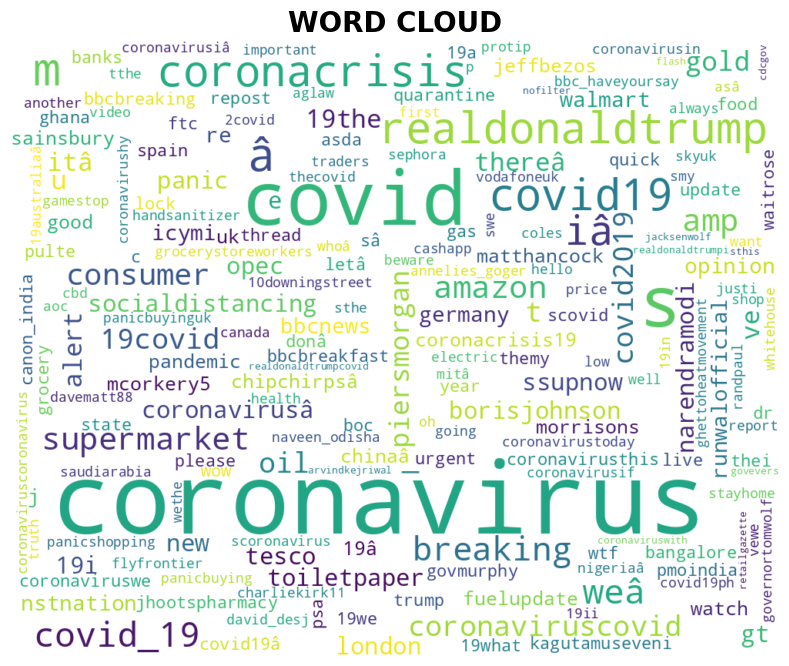

In [ ]:
# plotting word cloud
plt.figure(figsize=(15,8))
plt.title('WORD CLOUD', fontsize=20, weight='bold')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Model Training

##Train Test split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x=df.clean_tweets
y=df.Sentiment


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=50)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((32925,), (8232,), (32925,), (8232,))

#Vectorization

Count vectorization is a process of converting a piece of text into a numerical format that can be used by machine learning algorithms. In this process, the text is first split into words or tokens, and then each token is counted to create a vector of numbers representing the frequency of each word in the text.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

cnt_vec=CountVectorizer()
vec_x_train=cnt_vec.fit_transform(x_train)
vec_x_test=cnt_vec.transform(x_test)

In [ ]:
vec_x_train.shape

(32925, 49296)

In [ ]:
vec_x_test.shape

(8232, 49296)

#Model-Logistic Regression using GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression()
parameters={'penalty':['l1','l2'],
            'C':[100,10,1.0,0.1,0.01]}


log_gridcv=GridSearchCV(lr,parameters,cv=15)
log_gridcv.fit(vec_x_train,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
# predicting target values
predicting=log_gridcv.predict(vec_x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
# accuracy of the logistic regression

acc_lr_cv=accuracy_score(y_test,predicting)

print(acc_lr_cv)

0.8007774538386784


In [ ]:
# classification report of metrics score
lables=['neutral','positive','negative']

report=classification_report(y_test,predicting,target_names=lables)

print(report)

              precision    recall  f1-score   support

     neutral       0.81      0.79      0.80      3146
    positive       0.69      0.75      0.72      1519
    negative       0.84      0.83      0.84      3567

    accuracy                           0.80      8232
   macro avg       0.78      0.79      0.79      8232
weighted avg       0.80      0.80      0.80      8232



Text(0.5, 1.0, 'confusion matrix')

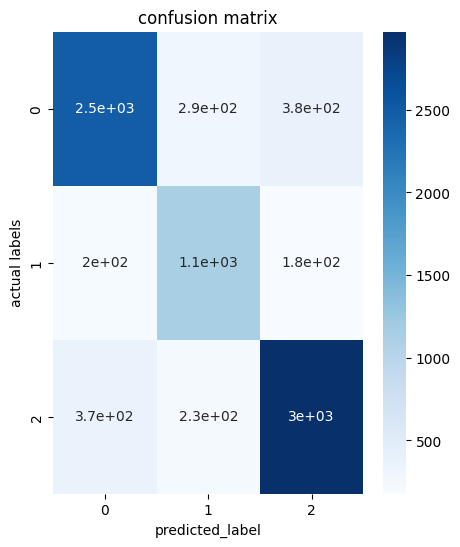

In [ ]:
# confusion matrix
cf=confusion_matrix(y_test,predicting)
plt.figure(figsize=(5,6))
ax=plt.subplot()
sns.heatmap(cf,annot=True,cmap='Blues')
ax.set_xlabel('predicted_label')
ax.set_ylabel('actual labels')
ax.set_title('confusion matrix')



1. Which hyperparameter optimization technique have you used and why?

answer:

In this project, we utilized GridSearchCV to fine-tune the hyperparameters of the Logistic Regression model. The two hyperparameters that were tuned are the regularization penalty, which can be either L1 or L2, and the inverse of regularization strength (C). GridSearchCV performs an exhaustive search over a specified set of hyperparameter values to find the combination that results in the best performance.

##ML model-Decision Tree using GridSearchcv

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(vec_x_train,y_train)


DecisionTreeClassifier()

In [ ]:
# predicting on test data
pred_dt=dt.predict(vec_x_test)
pred_dt

array(['Positive', 'Positive', 'Negative', ..., 'Neutral', 'Negative',
       'Negative'], dtype=object)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# accuracy score
cv_score_dt= cross_val_score(dt,vec_x_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt)))


Accuracy: 0.7038116932422172


In [ ]:
# classificaton report
labels=['Neutral','Positive','Negative']

report=classification_report(y_test,pred_dt,target_names=labels)
print(report)

              precision    recall  f1-score   support

     Neutral       0.70      0.67      0.68      3146
    Positive       0.62      0.72      0.67      1519
    Negative       0.76      0.74      0.75      3567

    accuracy                           0.71      8232
   macro avg       0.69      0.71      0.70      8232
weighted avg       0.71      0.71      0.71      8232



[Text(0, 0.5, 'Neutral'), Text(0, 1.5, 'Positive'), Text(0, 2.5, 'Negative')]

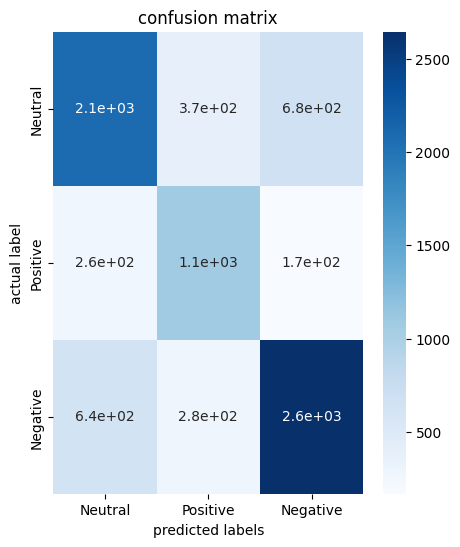

In [ ]:
# confusion matrix of decision tree

cf=confusion_matrix(y_test,pred_dt)
plt.figure(figsize=(5,6))
ax=plt.subplot()

sns.heatmap(cf,annot=True,cmap='Blues')
ax.set_xlabel('predicted labels')
ax.set_ylabel('actual label')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In this project, the Scikit-learn library is utilized to evaluate the performance of the Decision Tree model through cross-validation. Cross-validation is a technique used to assess how well a model generalizes to new data by dividing the dataset into multiple subsets, or folds. The model is trained on a subset of the data and tested on the remaining fold. This process is repeated several times, with each fold used as both training and testing data.

In this case, 5-fold cross-validation is performed, which means the dataset is divided into 5 equal parts. The Decision Tree model is trained and evaluated 5 times, with each subset used as the testing data once and the remaining four subsets used as training data in each iteration.

After completing the cross-validation, the np.mean function is applied to calculate the average accuracy score across all 5 folds.

##Ml Model-Random Forest using CV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(vec_x_train,y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# predicting labels on test data
pred_rf=rf.predict(vec_x_test)
print(pred_rf)

['Positive' 'Positive' 'Negative' ... 'Neutral' 'Negative' 'Negative']


In [ ]:
# calculate accuracy
accu_rf=(pred_rf==y_test).mean()
print(accu_rf)

0.7560738581146744


In [ ]:
# classification report
label=['Neutral','Positive',"Negative"]

report=classification_report(y_test,pred_rf)
print(report)

              precision    recall  f1-score   support

    Negative       0.79      0.71      0.75      3146
     Neutral       0.66      0.74      0.69      1519
    Positive       0.77      0.81      0.79      3567

    accuracy                           0.76      8232
   macro avg       0.74      0.75      0.74      8232
weighted avg       0.76      0.76      0.76      8232



[Text(0, 0.5, 'Neutral'), Text(0, 1.5, 'Positive'), Text(0, 2.5, 'Negative')]

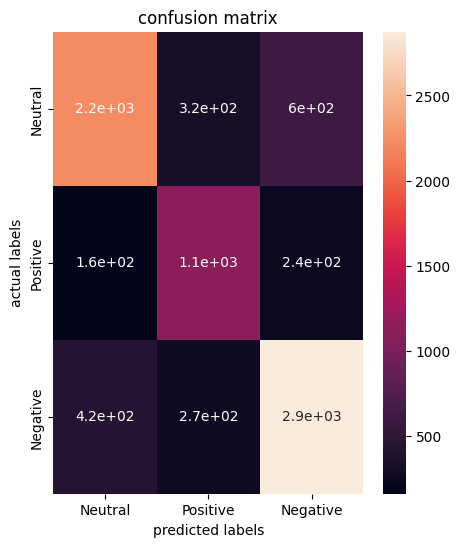

In [ ]:
# confusion matrix
cfm=confusion_matrix(y_test,pred_rf)
plt.figure(figsize=(5,6))
ax=plt.subplot()
sns.heatmap(cfm,annot=True)

ax.set_xlabel('predicted labels')
ax.set_ylabel('actual labels')
ax.set_title('confusion matrix')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Answer Here.

Random Forest algorithm was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and not slightly improved compared to the baseline model.


2.Which hyperparameter optimization technique have you used and why?

Answer Here.

Hyperparameter optimization technique has been used for the Random Forest Classifier. The classifier has been instantiated with the hyperparameter values n_estimators=100 and random_state=42, which are default values in the absence of explicit hyperparameter tuning.

##ML model-Stochastic Gradient Descent

In [ ]:
from sklearn .linear_model import SGDClassifier

sgd_clf=SGDClassifier(loss='hinge',penalty='l2', alpha=0.0001, random_state=42, max_iter=1000)
sgd_clf.fit(vec_x_train,y_train)


SGDClassifier(random_state=42)

In [ ]:
# predicting labels on test data
pred_sgdc=sgd_clf.predict(vec_x_test)
print(pred_sgdc)

['Positive' 'Positive' 'Negative' ... 'Neutral' 'Negative' 'Negative']


In [ ]:
# accuracy score
accu_sgdc=accuracy_score(y_test,pred_sgdc)
print(accu_sgdc)

0.8188775510204082


In [ ]:
labels=["neutral","positive","negative"]
report=classification_report(y_test,pred_sgdc)
print(report)



              precision    recall  f1-score   support

    Negative       0.83      0.80      0.82      3146
     Neutral       0.72      0.77      0.74      1519
    Positive       0.86      0.85      0.85      3567

    accuracy                           0.82      8232
   macro avg       0.80      0.81      0.80      8232
weighted avg       0.82      0.82      0.82      8232



In [ ]:
# confusion matrix
cf=confusion_matrix(y_test,pred_sgdc)
plt.figure(fifsize=(5,6))
ax=plt.subplot()
sns.heatmap(cf,annot=True)
ax.set_xlabel('predicted labels')
ax.set_ylabel('actual labels')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Answer Here.

Stochastic Gradient Descent algorithm was used to classify the data, resulting in an accuracy of 80%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

2.Which hyperparameter optimization technique have you used and why?

Answer Here.

The classifier has been instantiated with the hyperparameter values loss='hinge', penalty='l2', alpha=0.0001, random_state=42, and max_iter=1000, which are default values in the absence of explicit hyperparameter tuning.

#Conclusion
  
1.We applied models namely, Logistic Regression with Grid Search CV, Decision Tree Classifier,Stochastic Gradient Descent for Count Vectorization techniques.

2..We conclude that the machine is generating the best results for the Stochastic Gradient Descent(count vectorizer) model with an Accuracy of 80.43% followed by the Logistic Regression with Grid Search CV (TF/ID vectorizer) model with an Accuracy of 78.86%.

3.In the future ,we can repeat the analysis and compare it with the present sentimental analysis to gauge the impact of the initiatives on the ground.